In [12]:
# 書本範例： TensorFlow + Keras 深度學習人工智慧實務應用

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 讀資料

In [13]:
# Read data from tensorflow
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [14]:
# View the data
print('train', mnist.train.num_examples,
      ',validation', mnist.validation.num_examples,
      ',test', mnist.test.num_examples)
print('x shape:',mnist.train.images.shape)
print('y shape',mnist.train.labels.shape)

train 55000 ,validation 5000 ,test 10000
x shape: (55000, 784)
y shape (55000, 10)


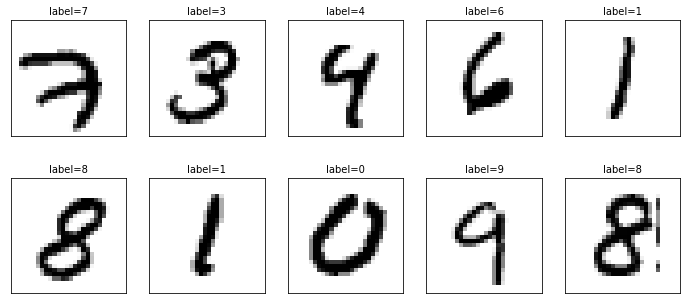

In [15]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    # Show muti-image at one times 
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax= plt.subplot(5,5,1+i)
        ax.imshow(np.reshape(images[idx], (28, 28)),cmap='binary')
        title = 'label='+str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title += ',predict='+str(prediction[idx])
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

plot_images_labels_prediction(mnist.train.images, mnist.train.labels, [], 0)

In [16]:
def layer(output_dim, input_dim, inputs, activation=None):
    w = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    xwb = tf.matmul(inputs, w) + b
    if activation is None:
        outputs = xwb
    else:
        outputs = activation(xwb)
    return outputs

In [17]:
x = tf.placeholder('float', [None, 784])
y_label = tf.placeholder('float', [None, 10])

h1 = layer(output_dim=512, input_dim=784, inputs=x,  activation=tf.nn.relu)
h2 = layer(output_dim=512, input_dim=512, inputs=h1, activation=tf.nn.relu)
y_predict = layer(output_dim=10, input_dim=512, inputs=h2)


loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict, labels=y_label))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)
correct_prediction = tf.equal(tf.argmax(y_label, 1), tf.argmax(y_predict, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

In [18]:
trainEpochs = 15
batchSize = 100
totalBatchs = int(mnist.train.num_examples/batchSize)

epoch_list=[]
accuracy_list=[]
loss_list=[]

from time import time
startTime = time()

In [19]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())


for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer, feed_dict={x: batch_x, y_label: batch_y})
        
    loss, acc = sess.run([loss_function,accuracy],
                          feed_dict={x: mnist.validation.images, 
                          y_label: mnist.validation.labels})

    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)    
    
    print("Train Epoch:", '%02d' % (epoch+1), "Loss=","{:.9f}".format(loss)," Accuracy=",acc)
    
duration =time()-startTime
print("Train Finished takes:",duration)     

Train Epoch: 01 Loss= 82.788024902  Accuracy= 0.8944
Train Epoch: 02 Loss= 55.675235748  Accuracy= 0.9194
Train Epoch: 03 Loss= 43.692108154  Accuracy= 0.9302
Train Epoch: 04 Loss= 41.922405243  Accuracy= 0.9326
Train Epoch: 05 Loss= 34.631446838  Accuracy= 0.9428
Train Epoch: 06 Loss= 33.982738495  Accuracy= 0.9414
Train Epoch: 07 Loss= 33.365383148  Accuracy= 0.9438
Train Epoch: 08 Loss= 32.048450470  Accuracy= 0.9454
Train Epoch: 09 Loss= 30.674659729  Accuracy= 0.9498
Train Epoch: 10 Loss= 28.642255783  Accuracy= 0.9522
Train Epoch: 11 Loss= 28.563959122  Accuracy= 0.9518
Train Epoch: 12 Loss= 26.440761566  Accuracy= 0.9586
Train Epoch: 13 Loss= 25.877595901  Accuracy= 0.9538
Train Epoch: 14 Loss= 25.282716751  Accuracy= 0.959
Train Epoch: 15 Loss= 27.497900009  Accuracy= 0.9572
Train Finished takes: 282.6519160270691


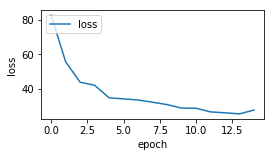

In [20]:
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

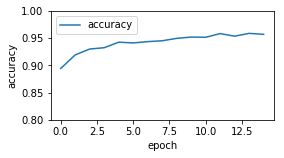

In [21]:
plt.plot(epoch_list, accuracy_list,label="accuracy" )
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [22]:
print('Accuracy', sess.run(accuracy, feed_dict={x: mnist.test.images, 
                                      y_label: mnist.test.labels}))

Accuracy 0.9567


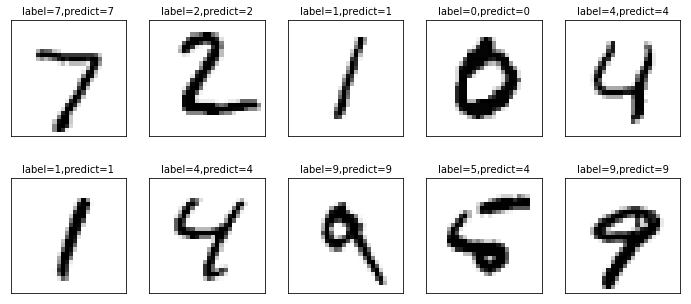

In [23]:
prediction_result = sess.run(tf.argmax(y_predict,1), feed_dict={x: mnist.test.images })

plot_images_labels_prediction(mnist.test.images, mnist.test.labels, prediction_result,0)